In [ ]:
!pip install text_hammer
!pip install gensim==4.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 115 kB 5.1 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 23.9 MB 1.5 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
import pandas as pd
import numpy as np
import spacy
spacy.load("en_core_web_sm")
import tqdm as notebook_tqdm
import text_hammer as th
import tensorflow as tf
import ipywidgets
import os
import gensim

/usr/local/lib/python3.7/dist-packages/spacy/language.py:1899: UserWarning: [W123] Argument disable with value [] is used instead of ['senter'] as specified in the config. Be aware that this might affect other components in your pipeline.
  config_value=config["nlp"][key],
/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [ ]:
!git clone https://github.com/vinayakumarr/WASSA-2017.git

Cloning into 'WASSA-2017'...
remote: Enumerating objects: 33, done.
remote: Total 33 (delta 0), reused 0 (delta 0), pack-reused 33
Unpacking objects: 100% (33/33), done.


In [ ]:
# Combining the training and validation dataset as no.of samples is less in this dataset

In [ ]:
train_path = './WASSA-2017/wassa/data/training/'
valid_path = './WASSA-2017/wassa/data/validation/'
test_path = './WASSA-2017/wassa/data/testing/'

In [ ]:
def gen_df(path):
    for idx, i in enumerate(os.listdir(path)):
        if idx == 0:
            lst = []
        temp_df = pd.read_csv(path + i, sep='\t')
        lst += temp_df,
    return pd.concat(lst)

In [ ]:
train_df = gen_df(train_path)
valid_df = gen_df(valid_path)
test_df = gen_df(test_path)

In [ ]:
train_df = pd.concat([train_df, valid_df])

In [ ]:
train_df

,id,tweet,tweettype,score
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896
...,...,...,...,...
79,10936,@Jen_ny69 People will always get offended ever...,anger,0.562
80,10937,@gayla_weeks1 I try not to let my anger seep i...,anger,0.625
81,10938,I hope my hustle don't offend nobody,anger,0.292
82,10939,"Just watched Django Unchained, Other people ma...",anger,0.229


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3960 entries, 0 to 83
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         3960 non-null   int64  
 1   tweet      3960 non-null   object 
 2   tweettype  3960 non-null   object 
 3   score      3960 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 154.7+ KB


In [ ]:
train_df.reset_index(drop=True)
test_df.reset_index(drop=True)

,id,tweet,tweettype,score
0,40860,My 2 teens sons just left in the car to get ha...,sadness,NONE
1,40861,My 2 teens sons just left in the car to get ha...,sadness,NONE
2,40862,HartRamsey'sUPLIFT If you're still discouraged...,sadness,NONE
3,40863,@AmontanaW I nearly dropped my phone into the ...,sadness,NONE
4,40864,Whenever I'm feeling sad I will listen to mons...,sadness,NONE
...,...,...,...,...
3137,22247,"@01Starblazer 9 -9 vs Atlanta this yr, 2 - 11 ...",fear,NONE
3138,22248,I'm shaking now.,fear,NONE
3139,22249,me: are you guys dating yet #trans #nervous #b...,fear,NONE
3140,22250,She: Why are you listening to The Eurythmics?\...,fear,NONE


In [ ]:
train_df = train_df[['tweet', 'tweettype']]
test_df = test_df[['tweet', 'tweettype']]

In [ ]:
train_df.tweettype.value_counts()

fear       1257
anger       941
joy         902
sadness     860
Name: tweettype, dtype: int64

In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [ ]:
# Encode labels in column 'species'.
train_df['tweettype']= label_encoder.fit_transform(train_df['tweettype'])
test_df['tweettype']= label_encoder.transform(test_df['tweettype']) ;

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
train_df.tweettype.value_counts()

1    1257
0     941
2     902
3     860
Name: tweettype, dtype: int64

In [ ]:
# fear - 1, anger - 0, joy - 2, sadness- 3

In [ ]:
%%time
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()
def text_preprocessing(df,col_name):
    column = col_name
    df[column] = df[column].progress_apply(lambda x:str(x).lower())
    df[column] = df[column].progress_apply(lambda x: th.cont_exp(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_html_tags(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.make_base(x)) #ran -> run,
    return(df)

train_df_new = text_preprocessing(train_df, 'tweet')
test_df_new = text_preprocessing(test_df, 'tweet');

  0%|          | 0/3960 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


  0%|          | 0/3960 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


  0%|          | 0/3960 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


  0%|          | 0/3960 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


  0%|          | 0/3960 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


  0%|          | 0/3960 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


  0%|          | 0/3960 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


  0%|          | 0/3142 [00:00<?, ?it/s]

  0%|          | 0/3142 [00:00<?, ?it/s]

  0%|          | 0/3142 [00:00<?, ?it/s]

  0%|          | 0/3142 [00:00<?, ?it/s]

  0%|          | 0/3142 [00:00<?, ?it/s]

  0%|          | 0/3142 [00:00<?, ?it/s]

  0%|          | 0/3142 [00:00<?, ?it/s]

CPU times: user 1min 31s, sys: 1.26 s, total: 1min 33s
Wall time: 1min 35s


In [ ]:
from keras.utils import to_categorical

In [ ]:
X_train = train_df['tweet']
y_train = to_categorical(train_df['tweettype'])
X_test = test_df['tweet']
y_test = to_categorical(test_df['tweettype'])

In [ ]:
X_train[0]

0    how the fuk who the heck move my fridge should...
0    I feel like I am drown depression anxiety falu...
0                           depression suck depression
0    just get back from see garydelaney in burslem ...
0    I know this is go to be one of those night whe...
0    1johndes ball watching rojod header was equall...
0    theclobra laugh out loud I think maybe could n...
0      zubairsabirpti pls do not insult the word molna
Name: tweet, dtype: object

In [ ]:
y_train[0]

array([1., 0., 0., 0.], dtype=float32)

In [ ]:
from keras.preprocessing.text import Tokenizer
num_words = 40000 # this means 10000 unique words can be taken
tokenizer=Tokenizer(num_words,lower=True)
tokenizer.fit_on_texts(X_train)

In [ ]:
from keras_preprocessing.sequence import pad_sequences

In [ ]:
X_train=tokenizer.texts_to_sequences(X_train) # this converts texts into some numeric sequences
X_train=pad_sequences(X_train,maxlen=300,padding='post')
X_test=tokenizer.texts_to_sequences(X_test) # this converts texts into some numeric sequences
X_test=pad_sequences(X_test,maxlen=300,padding='post')

In [ ]:
import gensim.downloader as api
glove_gensim  = api.load('glove-wiki-gigaword-100') #100 dimension

[==================================================] 100.0% 128.1/128.1MB downloaded


In [ ]:
vector_size = 100
gensim_weight_matrix = np.zeros((num_words ,vector_size))
gensim_weight_matrix.shape

(40000, 100)

In [ ]:
for word, index in tokenizer.word_index.items():
    if index < num_words: # since index starts with zero
        if word in glove_gensim.key_to_index:
            gensim_weight_matrix[index] = glove_gensim[word]
        else:
            gensim_weight_matrix[index] = np.zeros(100)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding,Bidirectional, Conv1D
import tensorflow
from tensorflow.keras.layers import Dropout

In [ ]:
EMBEDDING_DIM = 100
class_num = 4
model = Sequential()
model.add(Embedding(input_dim = num_words,
 output_dim = EMBEDDING_DIM,
 input_length= X_train.shape[1],
 weights = [gensim_weight_matrix],trainable = False))
model.add(Conv1D(filters=32, kernel_size=3))
model.add(Dropout(0.6))
model.add(Bidirectional(LSTM(100,return_sequences=True)))
model.add(Dropout(0.6))
model.add(Bidirectional(LSTM(200,return_sequences=True)))
model.add(Dropout(0.6))
model.add(Bidirectional(LSTM(100,return_sequences=False)))
model.add(Dense(class_num, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics = 'accuracy')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          4000000   
                                                                 
 conv1d (Conv1D)             (None, 298, 32)           9632      
                                                                 
 dropout (Dropout)           (None, 298, 32)           0         
                                                                 
 bidirectional (Bidirectiona  (None, 298, 200)         106400    
 l)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 298, 200)          0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 298, 400)         641600    
 nal)                                                   

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(
                            monitor='val_loss', patience=10)
checkpoint = tf.keras.callbacks.ModelCheckpoint(
                        'tsea3_model.h5',
                        verbose=1,
                        save_best_only=True,
                        monitor='val_accuracy')
history = model.fit(x=X_train,y= y_train,
              validation_data=(X_test, y_test),
              epochs=1000,
              callbacks=[stop_early, checkpoint])

Epoch 1/1000
124/124 [==============================] - ETA: 0s - loss: 1.3104 - accuracy: 0.3697
Epoch 1: val_accuracy improved from -inf to 0.41757, saving model to tsea3_model.h5
124/124 [==============================] - 29s 165ms/step - loss: 1.3104 - accuracy: 0.3697 - val_loss: 1.2505 - val_accuracy: 0.4176
Epoch 2/1000
124/124 [==============================] - ETA: 0s - loss: 1.2113 - accuracy: 0.4538
Epoch 2: val_accuracy improved from 0.41757 to 0.49650, saving model to tsea3_model.h5
124/124 [==============================] - 19s 155ms/step - loss: 1.2113 - accuracy: 0.4538 - val_loss: 1.1516 - val_accuracy: 0.4965
Epoch 3/1000
124/124 [==============================] - ETA: 0s - loss: 1.1331 - accuracy: 0.5040
Epoch 3: val_accuracy improved from 0.49650 to 0.50891, saving model to tsea3_model.h5
124/124 [==============================] - 19s 151ms/step - loss: 1.1331 - accuracy: 0.5040 - val_loss: 1.1302 - val_accuracy: 0.5089
Epoch 4/1000
124/124 [========================

Epoch 28/1000
124/124 [==============================] - ETA: 0s - loss: 0.5444 - accuracy: 0.7876
Epoch 28: val_accuracy improved from 0.74952 to 0.75239, saving model to tsea3_model.h5
124/124 [==============================] - 19s 155ms/step - loss: 0.5444 - accuracy: 0.7876 - val_loss: 0.6807 - val_accuracy: 0.7524
Epoch 29/1000
124/124 [==============================] - ETA: 0s - loss: 0.5325 - accuracy: 0.7955
Epoch 29: val_accuracy did not improve from 0.75239
124/124 [==============================] - 19s 151ms/step - loss: 0.5325 - accuracy: 0.7955 - val_loss: 0.6917 - val_accuracy: 0.7486
Epoch 30/1000
124/124 [==============================] - ETA: 0s - loss: 0.5404 - accuracy: 0.7927
Epoch 30: val_accuracy improved from 0.75239 to 0.75430, saving model to tsea3_model.h5
124/124 [==============================] - 19s 157ms/step - loss: 0.5404 - accuracy: 0.7927 - val_loss: 0.6791 - val_accuracy: 0.7543
Epoch 31/1000
124/124 [==============================] - ETA: 0s - loss: 

In [ ]:
import matplotlib.pyplot as plt

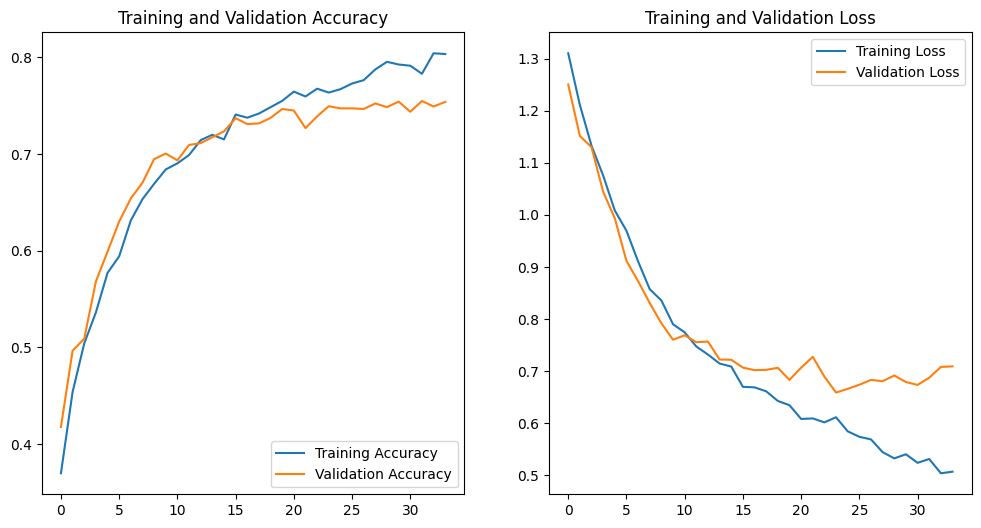

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.history['loss']))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
print(f'the Accuracy of the model is {max(val_acc)}')

the Accuracy of the model is 0.7549331784248352
